# COMPARE HSP2 TO HSPF USING TEST10

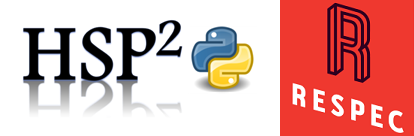

Copyright 2020 for this Jupyter Notebook and YouTube Video by RESPEC, INC.  All rights reserved.

$\textbf{HSP}^{\textbf{2}}\ \text{and}\ \textbf{HSP2}\ $ Copyright 2020 by RESPEC INC. and released under the *GNU AFFERO GENERAL PUBLIC LICENSE*

This Notebook will compare the results of running HSPF and HSP$^2$ for the basic hydrology (PWATER, IWATER, and HYDR) to confirm the proper calculations of HSP$^2$

Calleg is a real watershed and has
+ 27 IMPLND segments,
+ 129 PERLND segments,
+ 119 RCHRES segments,
+ 9 years of simulation time with hourly time steps (78,888 timesteps) from 1993-10-01 to 2002-10-01

This Notebook assumes HSPF has been run and the HBN data saved to an HDF5 file in the **HSPF RUN** directory.

## Required Python imports  and setup

In [ ]:
from pandas import options, read_hdf, DataFrame
from matplotlib import pyplot as plt
import os

# Set display options for convenience, does't change the data
options.display.max_rows    = 150
options.display.max_columns = 20
options.display.float_format = '{:.4f}'.format  # display 4 digits after the decimal point

%matplotlib inline

from HSP2 import main, versions
from HSP2tools import readWDM, readUCI
versions(['matplotlib', 'tables', 'h5py'])

: 

### If you get the HSP2 Not Found error:
```python
ModuleNotFoundError: No module named 'HSP2'
```
Then run the following terminal command with your local absolute path to this repo (enabled in this notebook with the `!` magic command), AND restart the kernel.
See https://github.com/LimnoTech/HSPsquared#4-add-your-hspsquared-path-to-anaconda-sites-packages

In [2]:
!conda-develop /Users/aaufdenkampe/Documents/Python/limno.HSPsquared/

path exists, skipping /Users/aaufdenkampe/Documents/Python/limno.HSPsquared
completed operation for: /Users/aaufdenkampe/Documents/Python/limno.HSPsquared


Convenient name strings to get to the data

In [3]:
# Confirm your active conda environment for this notebook.
os.environ['CONDA_DEFAULT_ENV']

'hsp2_py38_dev'

In [4]:
from pathlib import Path
# get current working directory
Path.cwd()

PosixPath('/Users/aaufdenkampe/Documents/Python/limno.HSPsquared/tests/test10/HSP2results')

In [9]:
wdmname = 'test10.wdm'
uciname = 'test10.uci'
HBN     = 'test10_hspf.h5'
hdfname = 'test10_hsp2_dev2WDM_6.h5'

## Run HSP2 on the calleg

In [10]:
# Optional setting to testing Numba
os.environ['NUMBA_DISABLE_JIT'] = '0' # '1' turns off Numba for this session only

### Create HDF5 file

In [7]:
%time
readUCI(uciname, hdfname)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.01 µs


In [8]:
%time
readWDM(wdmname, hdfname)

CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 3.81 µs
39 reading from wdm
41 reading from wdm
42 reading from wdm
46 reading from wdm
113 reading from wdm
119 reading from wdm
121 reading from wdm
122 reading from wdm
123 reading from wdm
124 reading from wdm
125 reading from wdm
126 reading from wdm
127 reading from wdm
131 reading from wdm
132 reading from wdm
134 reading from wdm
135 reading from wdm
136 reading from wdm
140 reading from wdm


,Start,Stop,Freq,Length,TSTYPE,TFILL,STAID,STNAM
TS039,1976-01-01 00:00:00,1977-01-01 00:00:00,1H,8784,PREC,-999.0000,HOURLY PREC,PRECIP TRAER IOWA
TS041,1976-01-01 00:00:00,1977-01-01 00:00:00,1D,366,EVAP,-999.0000,DAILY EVAP,FARMERS COOP WEATHER STN
TS042,1976-01-01 00:00:00,1977-01-01 00:00:00,1D,366,WIND,-999.0000,DAILY WIND,FARMERS COOP WEATHER STN
TS046,1976-01-01 00:00:00,1977-01-01 00:00:00,2H,4392,SOLR,-999.0000,2 HOUR RAD,FARMERS WEATHER STN
TS113,1976-01-01 00:00:00,1977-01-01 00:00:00,1D,366,FLOW,-999.0000,DAILY FLOW,IOWA RIVER MARSHALLTOWN
TS119,1976-01-01 00:00:00,1977-01-01 00:00:00,1D,366,FLOW,-999.0000,DAILY FLOW,IOWA RIVER MARENGO
TS121,1976-01-01 00:00:00,1977-01-01 00:00:00,2H,4392,ATMP,-999.0000,2 HOUR AIR TEMP,CEDAR RAPIDS IOWA
TS122,1976-01-01 00:00:00,1977-01-01 00:00:00,2H,4392,ATMP,-999.0000,2 HOUR AIR TEMP,IOWA FALLS IOWA
TS123,1976-01-01 00:00:00,1977-01-01 00:00:00,2H,4392,ATMP,-999.0000,2 HOUR AIR TEMP,MARSHALLTOWN IOWA
TS124,1976-01-01 00:00:00,1977-01-01 00:00:00,1D,366,DEWP,-999.0000,DAILY DEW PT,CEDAR RAPIDS IOWA


### Run

Using profiler

In [13]:
%%prun  -l 60 -T NumbaProfile.txt -q
main(hdfname, saveall=True)

2021-04-23 14:51:41.60   Processing started for file test10_hsp2_dev2WDM_6.h5; saveall=True
2021-04-23 14:51:46.93   Simulation Start: 1976-01-01 00:00:00, Stop: 1977-01-01 00:00:00
2021-04-23 14:51:46.93      PERLND P001 DELT(minutes): 60
2021-04-23 14:51:47.03         SNOW
2021-04-23 14:51:47.17         PWATER
2021-04-23 14:51:47.25         PSTEMP
2021-04-23 14:51:47.30         PWTGAS
2021-04-23 14:51:47.37      RCHRES R001 DELT(minutes): 60
2021-04-23 14:51:47.52         HYDR
2021-04-23 14:51:47.60         ADCALC
2021-04-23 14:51:47.80         CONS
2021-04-23 14:51:47.90         HTRCH
2021-04-23 14:51:48.09         SEDTRN
2021-04-23 14:51:48.52         GQUAL
2021-04-23 14:51:50.62      RCHRES R002 DELT(minutes): 60
2021-04-23 14:51:50.84         HYDR
2021-04-23 14:51:50.91         ADCALC
2021-04-23 14:51:51.02         CONS
2021-04-23 14:51:51.10         HTRCH
2021-04-23 14:51:51.20         SEDTRN
2021-04-23 14:51:51.51         GQUAL
2021-04-23 14:51:52.65      RCHRES R003 DELT(minut

In [14]:
with open('NumbaProfile.txt', 'r') as f:
    for line in f:
        total = float(line.split()[7])
        print(line)
        f.readline()
        f.readline()
        f.readline()
        f.readline()
        print(f.readline().rstrip())
        break
    sum = 0.0
    for line in f:
        sum += float(line.split()[1])
        print(line.rstrip())
        
        # Pareto rule, look for calls cumsum to 80% time, ignore the rest
        if sum >= 0.8 * total:
            break
print(f'Cum Sum {100.0 * sum/total:.2f}%')

         14762134 function calls (14511012 primitive calls) in 18.269 seconds

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        5    2.658    0.532    6.578    1.316 GQUAL.py:18(gqual)
    46083    1.165    0.000    1.165    0.000 {method '_g_getattr' of 'tables.hdf5extension.AttributeSet' objects}
        5    0.989    0.198    1.657    0.331 SEDTRN.py:13(sedtrn)
   258685    0.775    0.000    2.143    0.000 typeddict.py:147(__getitem__)
    18899    0.567    0.000    0.567    0.000 {method '_g_get_objinfo' of 'tables.hdf5extension.Group' objects}
     4700    0.516    0.000    0.619    0.000 {method '_open_array' of 'tables.hdf5extension.Array' objects}
     4869    0.428    0.000    0.428    0.000 {method '_g_get_lchild_attr' of 'tables.hdf5extension.Group' objects}
        5    0.356    0.071    0.476    0.095 HTRCH.py:39(htrch)
   430878    0.352    0.000    0.352    0.000 {built-in method numpy.zeros}
   418644    0.349    0.000    0.349    0.000 GQ

## BELOW HERE: Output from Steve's testing

Normal run

In [5]:
main(hdfname, saveall=True)

2020-11-04 20:43:22.36   Processing started for file hsp2.h5; saveall=True
2020-11-04 20:43:27.86   Simulation Start: 1976-01-01 00:00:00, Stop: 1977-01-01 00:00:00
2020-11-04 20:43:27.86      PERLND P001 DELT(minutes): 60
2020-11-04 20:43:31.54         SNOW
2020-11-04 20:43:51.30         PWATER
2020-11-04 20:43:51.48      RCHRES R001 DELT(minutes): 60
2020-11-04 20:43:51.72         HYDR
2020-11-04 20:43:52.31      RCHRES R002 DELT(minutes): 60
2020-11-04 20:43:52.47         HYDR
2020-11-04 20:43:52.68      RCHRES R003 DELT(minutes): 60
2020-11-04 20:43:52.85         HYDR
2020-11-04 20:43:52.97      RCHRES R004 DELT(minutes): 60
2020-11-04 20:43:53.16         HYDR
2020-11-04 20:43:53.33      IMPLND I001 DELT(minutes): 60
2020-11-04 20:43:53.54         SNOW
2020-11-04 20:43:53.67         IWATER
2020-11-04 20:43:53.76      RCHRES R005 DELT(minutes): 60
2020-11-04 20:43:53.94         HYDR
2020-11-04 20:43:54.10   Done; Run time is about 00:31.7 (mm:ss)


                                  

## Read Summary from HBN file

Find the higest frequency data available.

In [6]:
summary = read_hdf(HBN, 'SUMMARY')
summary.Frequency.unique()

FileNotFoundError: File hspf.h5 does not exist

So the best available is monthly data.

## Automate checking by output flow

In [6]:
def hsp2key(hspfkey):
    op, activity, segment, _ = hspfkey.split('_')
    return  f'RESULTS/{op}_{op[0]}{segment:0>3s}/{activity}'    

In [7]:
def monthlyoutflow(keys, flowname):
    data = DataFrame()
    for key in keys.index:
        hsp2 = read_hdf(hdfname, hsp2key(key))[flowname].resample('M').sum().to_numpy()
        hspf = read_hdf(HBN, key)[flowname].to_numpy()

        hsp2sum = hsp2.sum()
        hspfsum = hspf.sum()

        segment = key.split('_')[2]
        
        data.loc[segment, 'HSP2 SUM'] = hsp2.sum()
        data.loc[segment, 'HSPF SUM'] = hspf.sum()
        data.loc[segment, 'Percent diff']      = 100.0 *    (hspfsum - hsp2sum)/hspfsum
        data.loc[segment, 'abs(Percent diff)'] = 100.0 * abs(hspfsum - hsp2sum)/hspfsum

    return data.sort_values(by=['abs(Percent diff)'])    

### Define a function to plot HSPF and HSP2 data

In [8]:
def plot(operation, ils, activity, name, how='sum'):
    hspf = f'{operation}_{activity}_{ils:0>3s}_4'
    tshspf = read_hdf(HBN, hspf)[name]
    
    hsp2 = f'RESULTS/{operation}_{operation[0]}{ils:0>3s}/{activity}'
    if how == 'sum':
        tshsp2 = read_hdf(hdfname, hsp2)[name].resample('M').sum().shift(1,'D')
    elif how == 'last':
        tshsp2 = read_hdf(hdfname, hsp2)[name].resample('M').last().shift(1,'D')
    
    plt.figure(figsize=(10,8))
    plt.plot(tshspf.index, tshspf, label='HSPF', color='r')
    plt.plot(tshsp2.index, tshsp2, label='HSP2', color='b')
    plt.legend()
    plt.title(f'{operation} {operation[0]}{ils:0>3s}, {activity} {name}')


In [9]:
def scatter(operation, ils, activity, name, how='sum'):
    hspf = f'{operation}_{activity}_{ils:0>3s}_4'
    tshspf = read_hdf(HBN, hspf)[name]
    
    hsp2 = f'RESULTS/{operation}_{operation[0]}{ils:0>3s}/{activity}'
    if how == 'sum':
        tshsp2 = read_hdf(hdfname, hsp2)[name].resample('M').sum().shift(1,'D')
    elif how == 'last':
        tshsp2 = read_hdf(hdfname, hsp2)[name].resample('M').last().shift(1,'D')
    
    plt.scatter(tshspf, tshsp2)

### IMPLND

In [10]:
implndkeys = summary[(summary.Frequency=='Monthly') & (summary.Operation=='IMPLND')]
implndkeys[0:10]

,Operation,Activity,segment,Frequency,Shape,Start,Stop
IMPLND_IWATER_011_4,IMPLND,IWATER,11,Monthly,"(108, 6)",1993-11-01,2002-10-01
IMPLND_IWATER_021_4,IMPLND,IWATER,21,Monthly,"(108, 6)",1993-11-01,2002-10-01
IMPLND_IWATER_041_4,IMPLND,IWATER,41,Monthly,"(108, 6)",1993-11-01,2002-10-01
IMPLND_IWATER_051_4,IMPLND,IWATER,51,Monthly,"(108, 6)",1993-11-01,2002-10-01
IMPLND_IWATER_061_4,IMPLND,IWATER,61,Monthly,"(108, 6)",1993-11-01,2002-10-01
IMPLND_IWATER_071_4,IMPLND,IWATER,71,Monthly,"(108, 6)",1993-11-01,2002-10-01
IMPLND_IWATER_081_4,IMPLND,IWATER,81,Monthly,"(108, 6)",1993-11-01,2002-10-01
IMPLND_IWATER_101_4,IMPLND,IWATER,101,Monthly,"(108, 6)",1993-11-01,2002-10-01
IMPLND_IWATER_111_4,IMPLND,IWATER,111,Monthly,"(108, 6)",1993-11-01,2002-10-01
IMPLND_IWATER_121_4,IMPLND,IWATER,121,Monthly,"(108, 6)",1993-11-01,2002-10-01


In [11]:
delta = monthlyoutflow(implndkeys, 'SURO')
delta

,HSP2 SUM,HSPF SUM,Percent diff,abs(Percent diff)
291,117.5699,117.5699,-0.0000,0.0000
281,137.7904,137.7904,0.0000,0.0000
101,144.1288,144.1288,-0.0000,0.0000
021,122.5966,122.5966,0.0000,0.0000
051,120.2708,120.2708,0.0000,0.0000
081,118.7938,118.7938,-0.0000,0.0000
041,141.2890,141.2890,0.0000,0.0000
271,136.4228,136.4228,0.0000,0.0000
251,116.6337,116.6337,0.0000,0.0000
201,172.5608,172.5608,-0.0000,0.0000


Look at the statistics for the percent difference column

In [12]:
delta.describe()

,HSP2 SUM,HSPF SUM,Percent diff,abs(Percent diff)
count,27.0000,27.0000,27.0000,27.0000
mean,128.5445,128.5445,0.0000,0.0000
std,12.0012,12.0012,0.0000,0.0000
min,115.9610,115.9610,-0.0000,0.0000
25%,120.0074,120.0074,0.0000,0.0000
50%,126.2947,126.2947,0.0000,0.0000
75%,133.6036,133.6036,0.0000,0.0000
max,172.5608,172.5608,0.0000,0.0000


<AxesSubplot:>

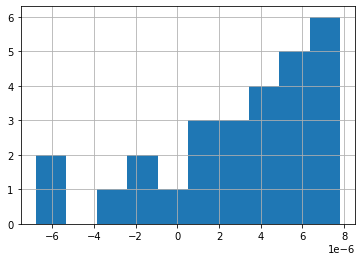

In [13]:
delta['Percent diff'].hist()

In [14]:
ils = delta.index[-1]
print('WORST IMPLND SEGMENT IS', ils)

WORST IMPLND SEGMENT IS 231


#### IMPLND IWATER SURO, Monthly

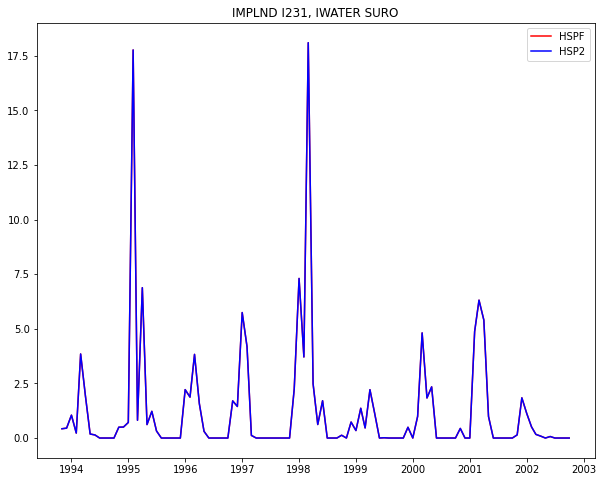

In [15]:
plot('IMPLND', ils, 'IWATER', 'SURO', 'sum')

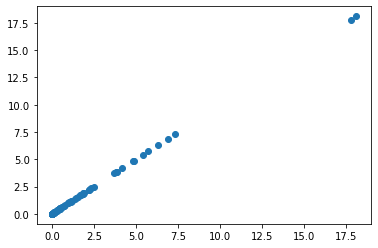

In [16]:
scatter('IMPLND', ils, 'IWATER', 'SURO', 'sum')

#### IMPLND IWATER IMPEV, Monthly

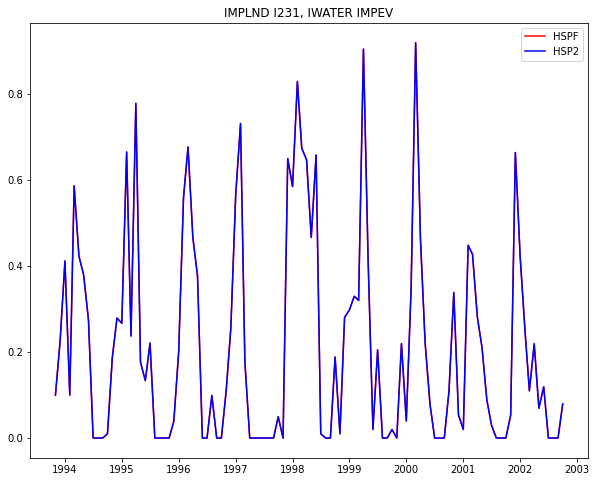

In [17]:
plot('IMPLND', ils, 'IWATER', 'IMPEV', 'sum')

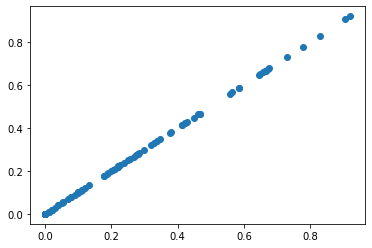

In [18]:
scatter('IMPLND', ils, 'IWATER', 'IMPEV', 'sum')

#### IMPLND IWATER PET, Monthly

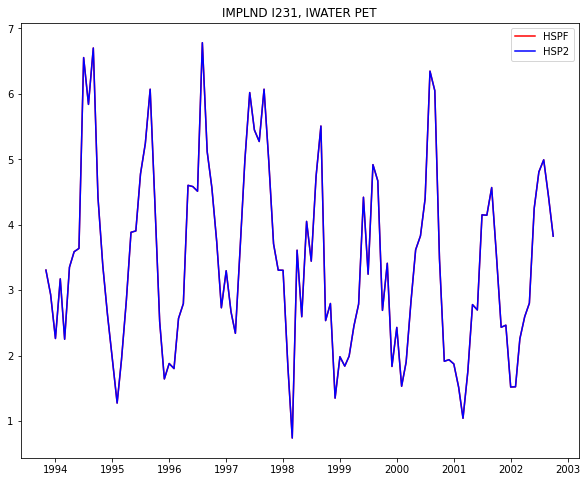

In [19]:
plot('IMPLND', ils, 'IWATER', 'PET', 'sum')

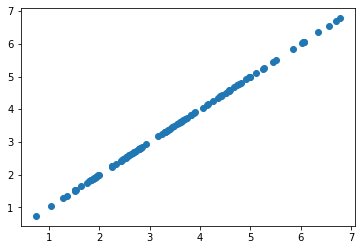

In [20]:
scatter('IMPLND', ils, 'IWATER', 'PET', 'sum')

#### IMPLND IWATER RETS, Monthly

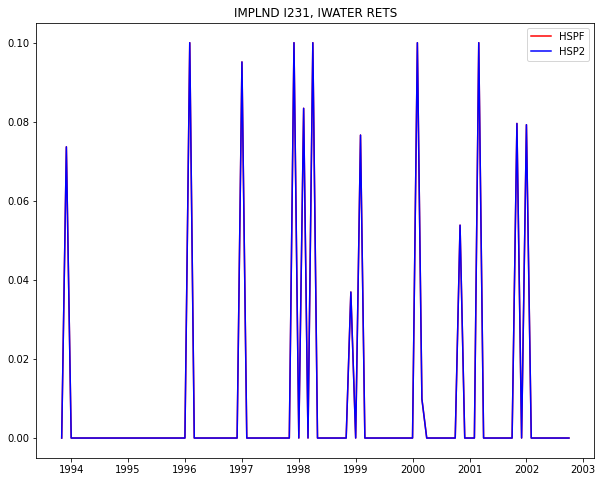

In [21]:
plot('IMPLND', ils, 'IWATER', 'RETS', 'last')

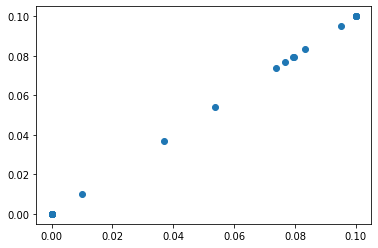

In [22]:
scatter('IMPLND', ils, 'IWATER', 'RETS', 'last')

#### IMPLND IWATER SUPY, Monthly

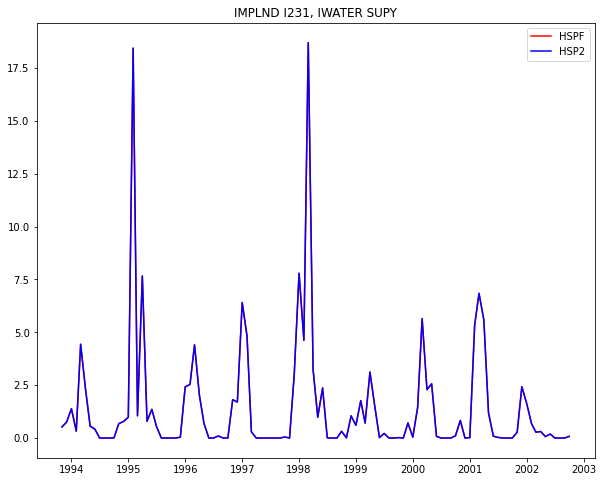

In [23]:
plot('IMPLND', ils, 'IWATER', 'SUPY', 'sum')

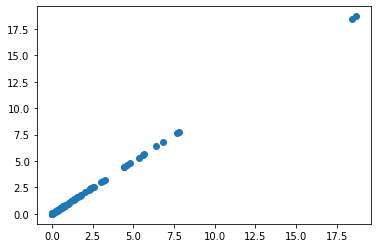

In [24]:
scatter('IMPLND', ils, 'IWATER', 'SUPY', 'sum')

#### IMPLND IWATER SURS, Monthly

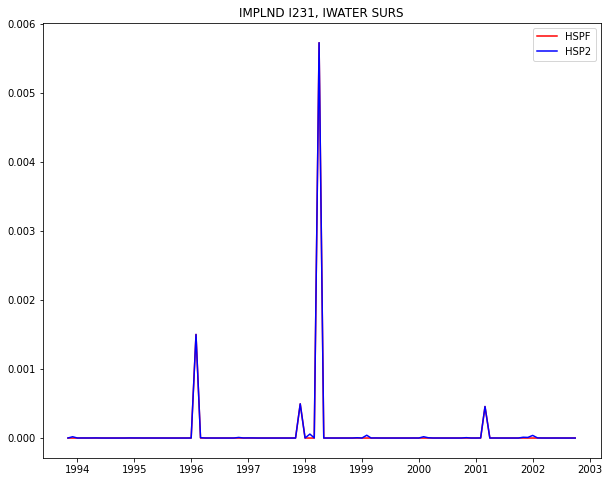

In [25]:
plot('IMPLND', ils, 'IWATER', 'SURS', 'last')

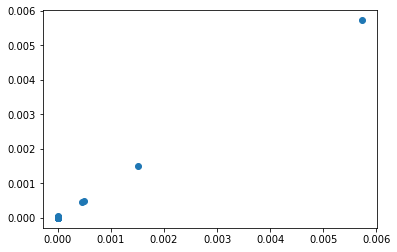

In [26]:
scatter('IMPLND', ils, 'IWATER', 'SURS', 'last')

## Automate checking PERLNDs for PERO

In [27]:
perlndkeys = summary[(summary.Frequency=='Monthly') & (summary.Operation=='PERLND')]
perlndkeys[0:10]

,Operation,Activity,segment,Frequency,Shape,Start,Stop
PERLND_PWATER_011_4,PERLND,PWATER,11,Monthly,"(108, 27)",1993-11-01,2002-10-01
PERLND_PWATER_012_4,PERLND,PWATER,12,Monthly,"(108, 32)",1993-11-01,2002-10-01
PERLND_PWATER_013_4,PERLND,PWATER,13,Monthly,"(108, 32)",1993-11-01,2002-10-01
PERLND_PWATER_014_4,PERLND,PWATER,14,Monthly,"(108, 32)",1993-11-01,2002-10-01
PERLND_PWATER_015_4,PERLND,PWATER,15,Monthly,"(108, 32)",1993-11-01,2002-10-01
PERLND_PWATER_021_4,PERLND,PWATER,21,Monthly,"(108, 27)",1993-11-01,2002-10-01
PERLND_PWATER_022_4,PERLND,PWATER,22,Monthly,"(108, 32)",1993-11-01,2002-10-01
PERLND_PWATER_023_4,PERLND,PWATER,23,Monthly,"(108, 32)",1993-11-01,2002-10-01
PERLND_PWATER_024_4,PERLND,PWATER,24,Monthly,"(108, 32)",1993-11-01,2002-10-01
PERLND_PWATER_025_4,PERLND,PWATER,25,Monthly,"(108, 32)",1993-11-01,2002-10-01


In [28]:
delta = monthlyoutflow(perlndkeys, 'PERO')
delta

,HSP2 SUM,HSPF SUM,Percent diff,abs(Percent diff)
055,64.7859,64.7859,-0.0000,0.0000
226,29.4270,29.4270,-0.0000,0.0000
222,45.9145,45.9145,-0.0000,0.0000
124,56.8129,56.8129,-0.0000,0.0000
235,85.6543,85.6543,-0.0000,0.0000
071,13.8709,13.8709,-0.0000,0.0000
275,44.8519,44.8519,0.0000,0.0000
135,49.4472,49.4472,-0.0000,0.0000
023,57.9035,57.9035,-0.0000,0.0000
201,10.9715,10.9715,-0.0000,0.0000


Look at the statistics for the percent difference column

In [29]:
delta.describe()

,HSP2 SUM,HSPF SUM,Percent diff,abs(Percent diff)
count,129.0000,129.0000,129.0000,129.0000
mean,45.5122,45.5122,-0.0000,0.0001
std,26.6657,26.6657,0.0001,0.0000
min,4.6437,4.6437,-0.0003,0.0000
25%,26.9619,26.9620,-0.0001,0.0000
50%,46.7790,46.7790,-0.0000,0.0000
75%,61.3993,61.3994,-0.0000,0.0001
max,121.6003,121.6003,0.0002,0.0003


<AxesSubplot:>

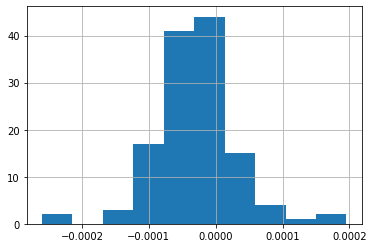

In [30]:
delta['Percent diff'].hist()

In [31]:
pls = delta.index[-1]
print('WORST PERLND SEGMENT IS', pls)

WORST PERLND SEGMENT IS 125


#### PERLND PWATER AGWLI

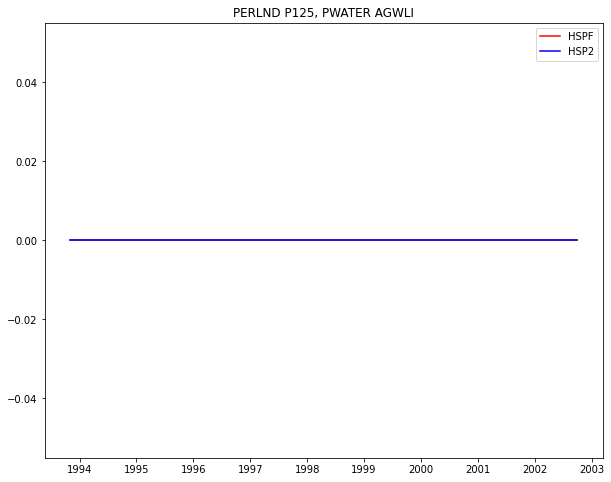

In [32]:
plot('PERLND', pls, 'PWATER', 'AGWLI', 'sum')

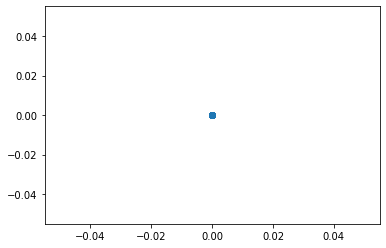

In [33]:
scatter('PERLND', pls, 'PWATER', 'AGWLI', 'sum')

#### PERLND PWATER SURLI

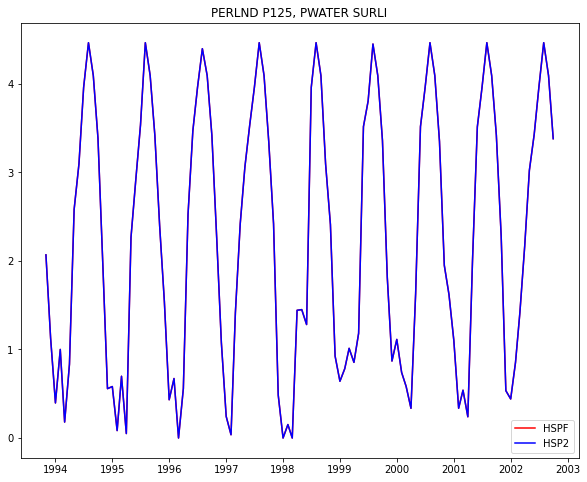

In [34]:
plot('PERLND', pls, 'PWATER', 'SURLI', 'sum')

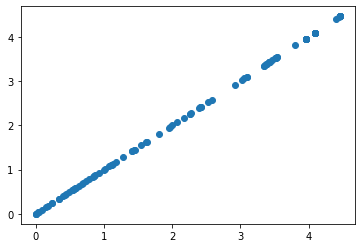

In [35]:
scatter('PERLND', pls, 'PWATER', 'SURLI', 'sum')

#### PERLND PWATER AGWO

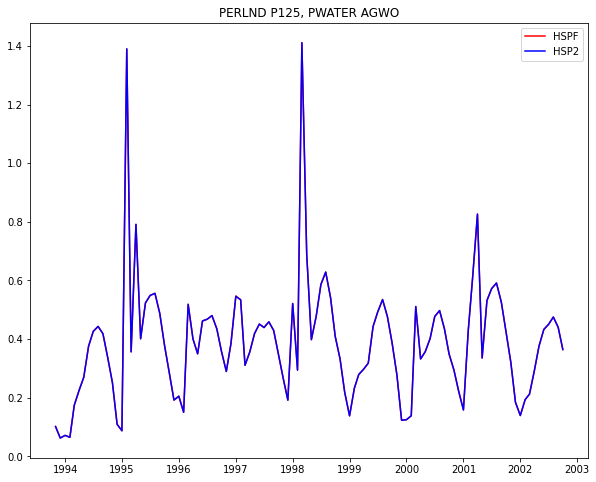

In [36]:
plot('PERLND', pls, 'PWATER', 'AGWO', 'sum')

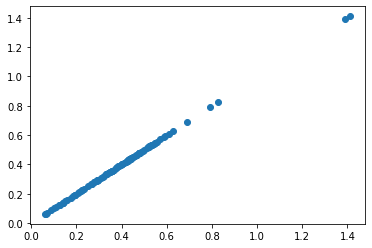

In [37]:
scatter('PERLND', pls, 'PWATER', 'AGWO', 'sum')

#### PERLND PWATER BASET

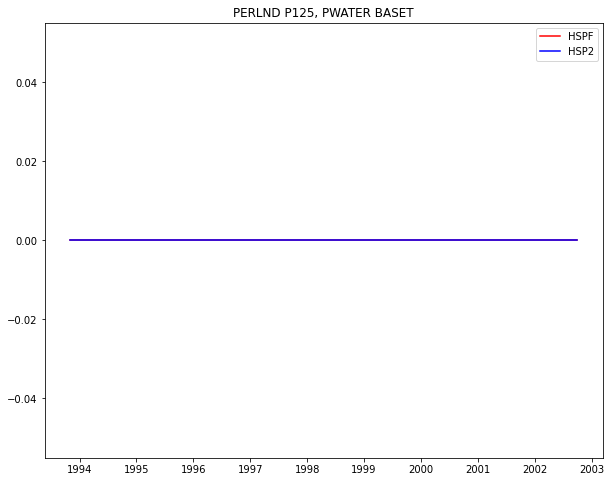

In [38]:
plot('PERLND', pls, 'PWATER', 'BASET', 'sum')

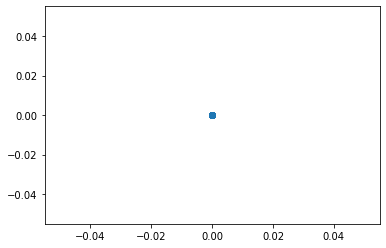

In [39]:
scatter('PERLND', pls, 'PWATER', 'BASET', 'sum')

##### PERLND PWATER CEPE

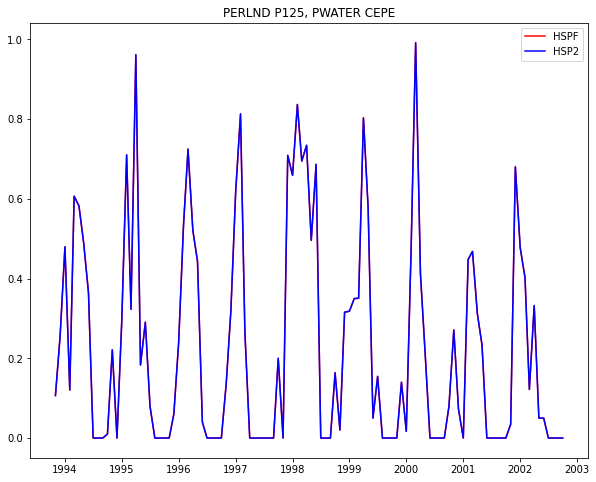

In [40]:
plot('PERLND', pls, 'PWATER', 'CEPE', 'sum')

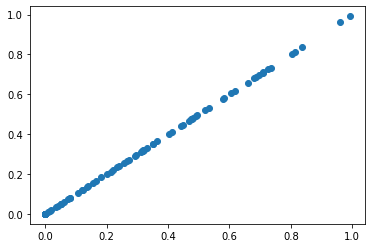

In [41]:
scatter('PERLND', pls, 'PWATER', 'CEPE', 'sum')

#### PERLND PWATER IFWI

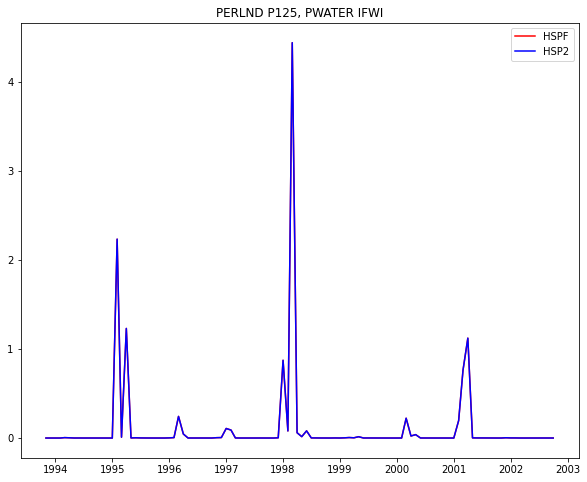

In [42]:
plot('PERLND', pls, 'PWATER', 'IFWI', 'sum')

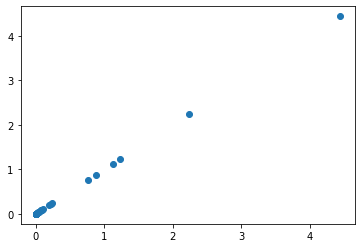

In [43]:
scatter('PERLND', pls, 'PWATER', 'IFWI', 'sum')

#### PERLND PWATER IFWO

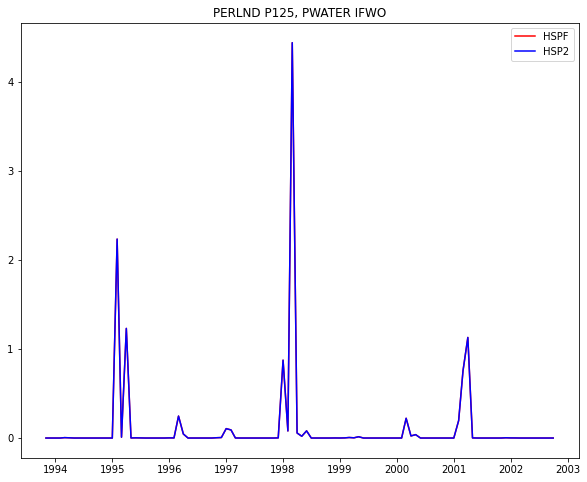

In [44]:
plot('PERLND', pls, 'PWATER', 'IFWO', 'sum')

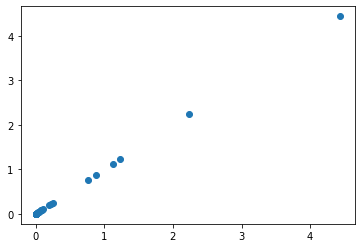

In [45]:
scatter('PERLND', pls, 'PWATER', 'IFWO', 'sum')

#### PERLND PWATER IGWI

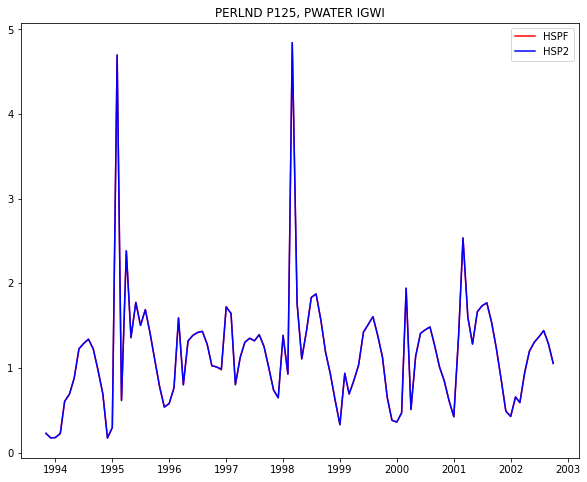

In [46]:
plot('PERLND', pls, 'PWATER', 'IGWI', 'sum')

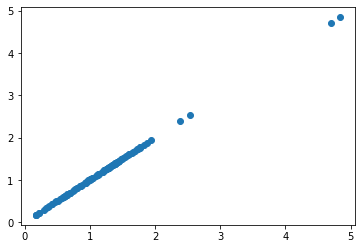

In [47]:
scatter('PERLND', pls, 'PWATER', 'IGWI', 'sum')

#### PERLND PWATER INFIL

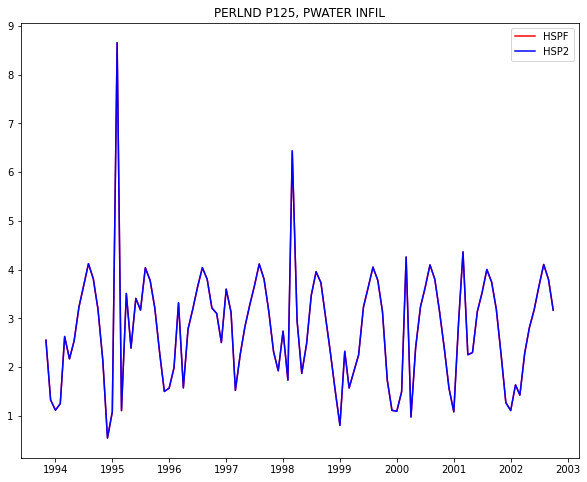

In [48]:
plot('PERLND', pls, 'PWATER', 'INFIL', 'sum')

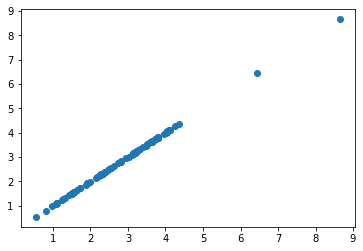

In [49]:
scatter('PERLND', pls, 'PWATER', 'INFIL', 'sum')

#### PERLND PWATER LZET

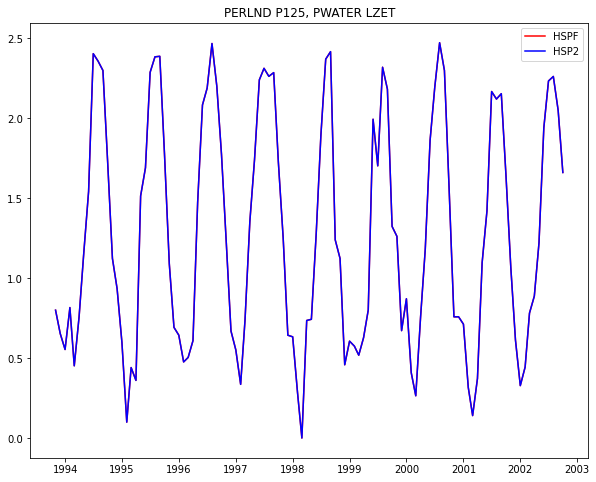

In [50]:
plot('PERLND', pls, 'PWATER', 'LZET', 'sum')

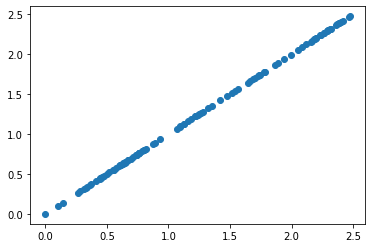

In [51]:
scatter('PERLND', pls, 'PWATER', 'LZET', 'sum')

#### PERLND PWATER PERC

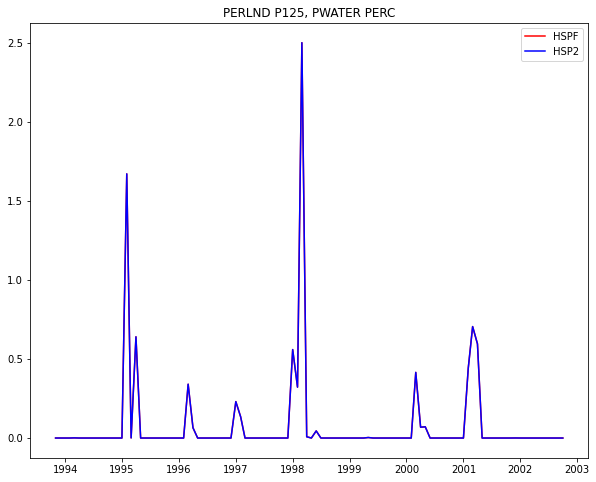

In [52]:
plot('PERLND', pls, 'PWATER', 'PERC', 'sum')

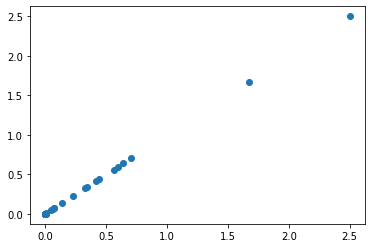

In [53]:
scatter('PERLND', pls, 'PWATER', 'PERC', 'sum')

#### PERLND PWATER PERO

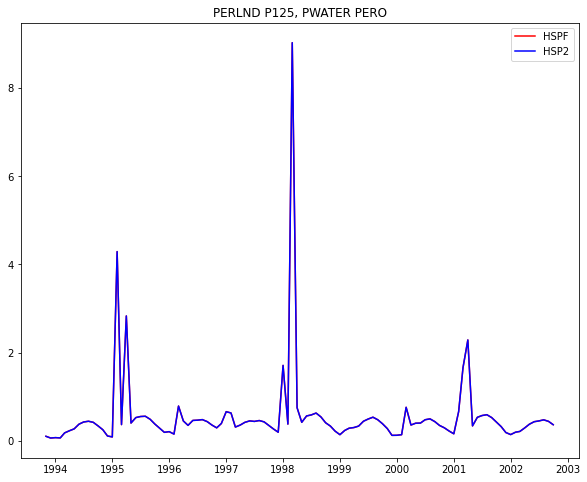

In [54]:
plot('PERLND', pls, 'PWATER', 'PERO', 'sum')

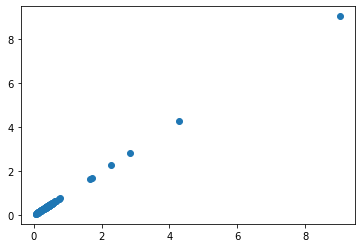

In [55]:
scatter('PERLND', pls, 'PWATER', 'PERO', 'sum')

#### PERLND PWATER PERS

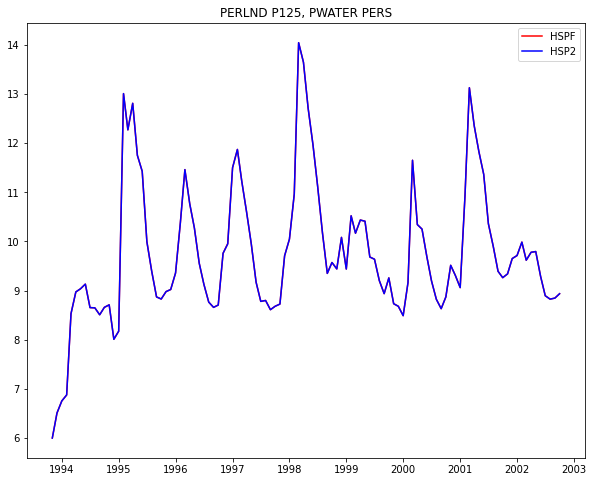

In [56]:
plot('PERLND', pls, 'PWATER', 'PERS', 'last')

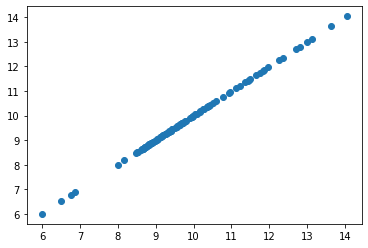

In [57]:
scatter('PERLND', pls, 'PWATER', 'PERS', 'last')

#### PERLND PWATER PET, Monthly

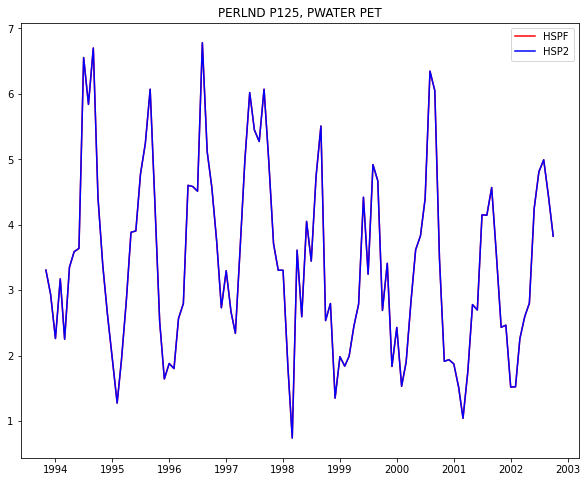

In [58]:
plot('PERLND', pls, 'PWATER', 'PET', 'sum')

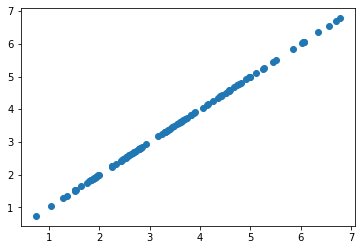

In [59]:
scatter('PERLND', pls, 'PWATER', 'PET', 'sum')

#### PERLND PWATER SUPY

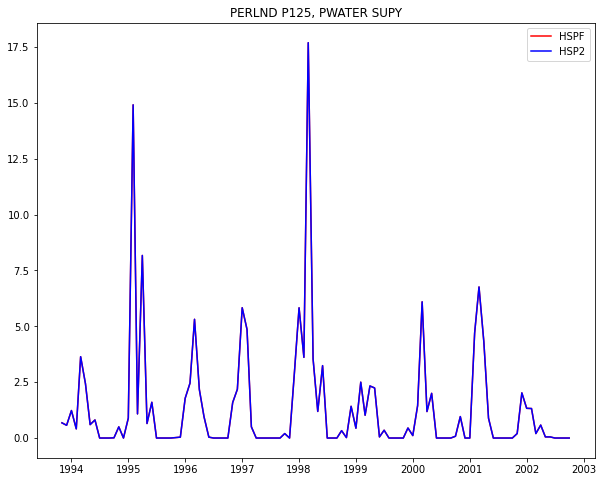

In [60]:
plot('PERLND', pls, 'PWATER', 'SUPY', 'sum')

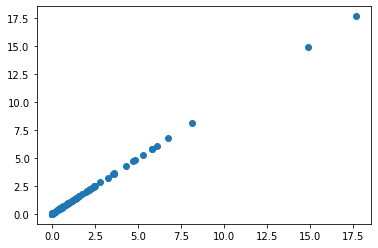

In [61]:
scatter('PERLND', pls, 'PWATER', 'SUPY', 'sum')

#### PERLND PWATER SURO

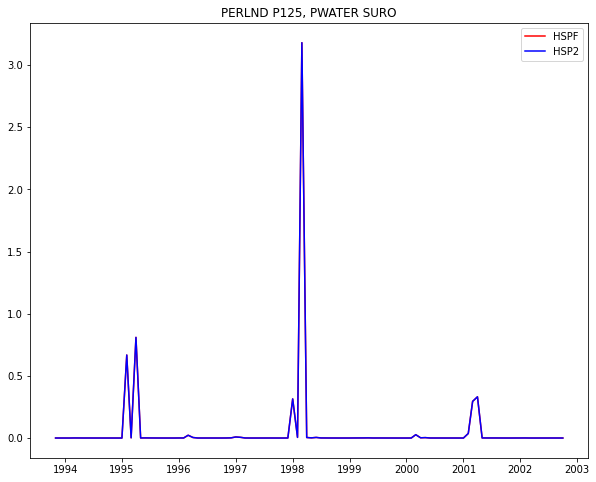

In [62]:
plot('PERLND', pls, 'PWATER', 'SURO', 'sum')

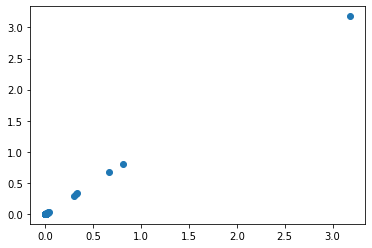

In [63]:
scatter('PERLND', pls, 'PWATER', 'SURO', 'sum')

#### PERLND PWATER TAET

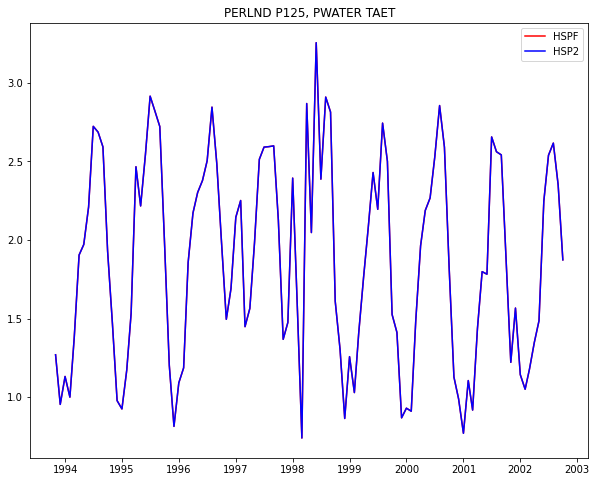

In [64]:
plot('PERLND', pls, 'PWATER', 'TAET', 'sum')

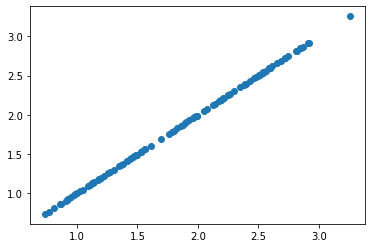

In [65]:
scatter('PERLND', pls, 'PWATER', 'TAET', 'sum')

#### PERLND PWATER UZET

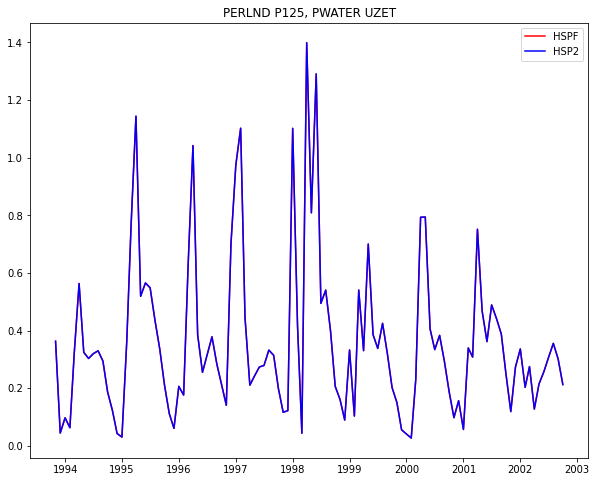

In [66]:
plot('PERLND', pls, 'PWATER', 'UZET', 'sum')

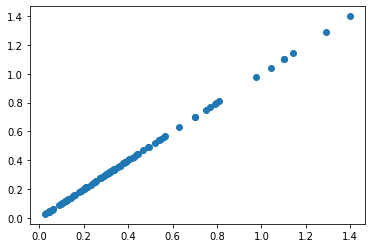

In [67]:
scatter('PERLND', pls, 'PWATER', 'UZET', 'sum')

#### PERLND PWATER UZI

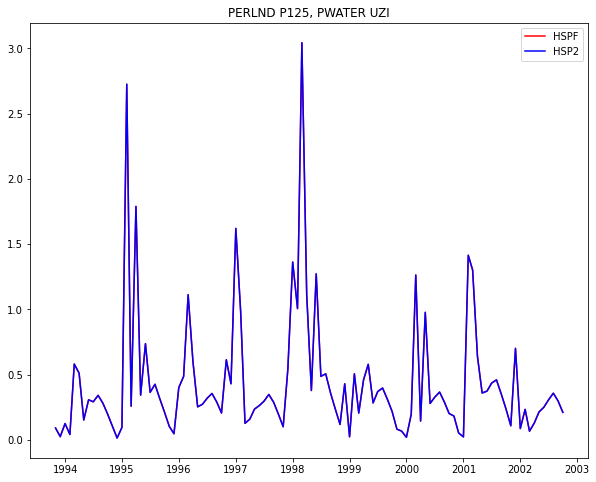

In [68]:
plot('PERLND', pls, 'PWATER', 'UZI', 'sum')

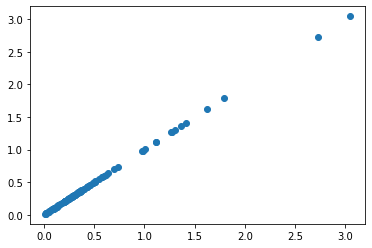

In [69]:
scatter('PERLND', pls, 'PWATER', 'UZI', 'sum')

## RCHRES

In [70]:
rchreskeys = summary[(summary.Frequency=='Monthly') & (summary.Operation=='RCHRES')]
rchreskeys[0:10]

,Operation,Activity,segment,Frequency,Shape,Start,Stop
RCHRES_HYDR_001_4,RCHRES,HYDR,1,Monthly,"(108, 17)",1993-11-01,2002-10-01
RCHRES_HYDR_021_4,RCHRES,HYDR,21,Monthly,"(108, 17)",1993-11-01,2002-10-01
RCHRES_HYDR_022_4,RCHRES,HYDR,22,Monthly,"(108, 17)",1993-11-01,2002-10-01
RCHRES_HYDR_023_4,RCHRES,HYDR,23,Monthly,"(108, 17)",1993-11-01,2002-10-01
RCHRES_HYDR_011_4,RCHRES,HYDR,11,Monthly,"(108, 17)",1993-11-01,2002-10-01
RCHRES_HYDR_024_4,RCHRES,HYDR,24,Monthly,"(108, 17)",1993-11-01,2002-10-01
RCHRES_HYDR_031_4,RCHRES,HYDR,31,Monthly,"(108, 17)",1993-11-01,2002-10-01
RCHRES_HYDR_071_4,RCHRES,HYDR,71,Monthly,"(108, 17)",1993-11-01,2002-10-01
RCHRES_HYDR_043_4,RCHRES,HYDR,43,Monthly,"(108, 17)",1993-11-01,2002-10-01
RCHRES_HYDR_041_4,RCHRES,HYDR,41,Monthly,"(108, 17)",1993-11-01,2002-10-01


In [71]:
delta = monthlyoutflow(rchreskeys, 'ROVOL')
delta

,HSP2 SUM,HSPF SUM,Percent diff,abs(Percent diff)
195,5182.8633,5182.8634,0.0000,0.0000
525,755.3912,755.3912,-0.0000,0.0000
193,4381.4727,4381.4730,0.0000,0.0000
504,72021.9453,72021.9519,0.0000,0.0000
502,19465.1562,19465.1591,0.0000,0.0000
952,709.6678,709.6680,0.0000,0.0000
042,1649.1652,1649.1648,-0.0000,0.0000
964,754.5003,754.5005,0.0000,0.0000
401,24895.3965,24895.4035,0.0000,0.0000
011,4362.4233,4362.4249,0.0000,0.0000


Look at the statistics for the percent difference column

In [72]:
delta.describe()

,HSP2 SUM,HSPF SUM,Percent diff,abs(Percent diff)
count,119.0000,119.0000,119.0000,119.0000
mean,60604.2668,60604.4235,0.0009,0.0013
std,109767.5969,109767.6913,0.0039,0.0038
min,50.7809,50.7808,-0.0045,0.0000
25%,2607.0101,2607.0087,-0.0003,0.0001
50%,8044.9546,8044.9289,-0.0001,0.0002
75%,56394.4258,56394.4002,0.0002,0.0005
max,628905.2500,628904.6303,0.0207,0.0207


<AxesSubplot:>

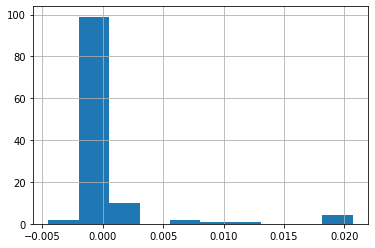

In [73]:
delta['Percent diff'].hist()

In [74]:
rid = delta.index[-1]
print('WORST RCHRES SEGMENT IS', rid)

WORST RCHRES SEGMENT IS 225


#### RCHRES HYDR IVOL

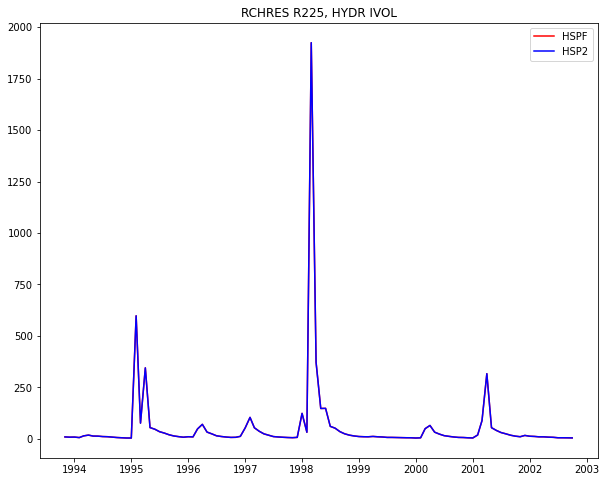

In [75]:
plot('RCHRES', rid, 'HYDR', 'IVOL', 'sum')

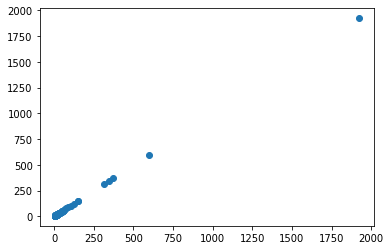

In [76]:
scatter('RCHRES', rid, 'HYDR', 'IVOL', 'sum')

#### RCHRES HYDR PRSUPY

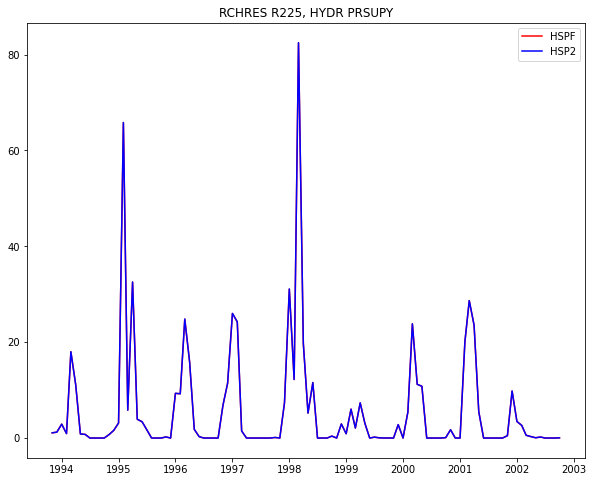

In [77]:
plot('RCHRES', rid, 'HYDR', 'PRSUPY', 'sum')

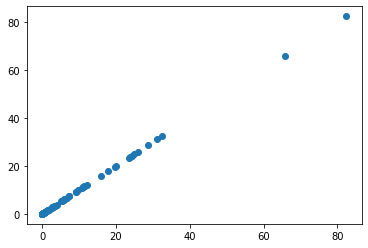

In [78]:
scatter('RCHRES', rid, 'HYDR', 'PRSUPY', 'sum')

#### RCHRES HYDR ROVOL

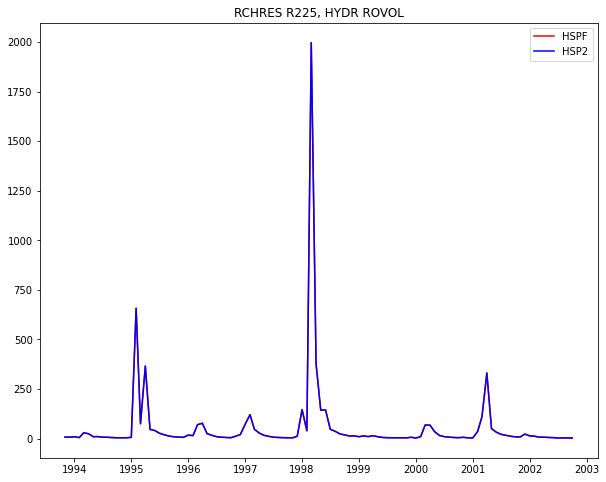

In [79]:
plot('RCHRES', rid, 'HYDR', 'ROVOL', 'sum')

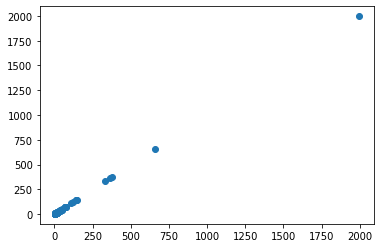

In [80]:
scatter('RCHRES', rid, 'HYDR', 'ROVOL', 'sum')

#### RCHRES HYDR VOL

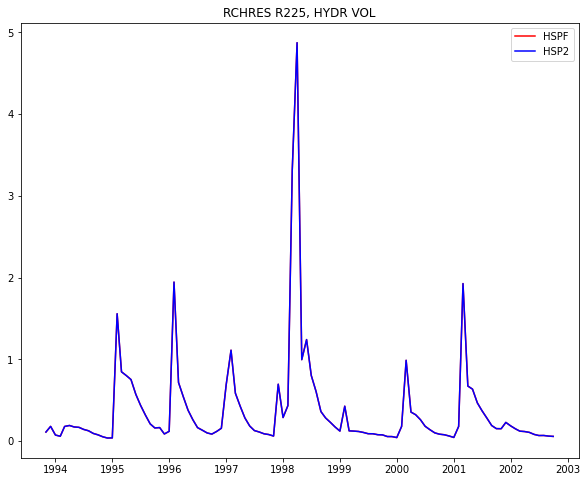

In [81]:
plot('RCHRES', rid, 'HYDR', 'VOL', 'last')

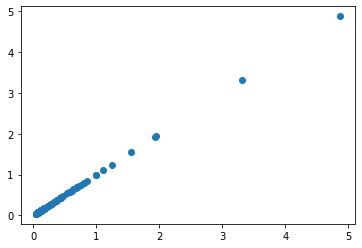

In [82]:
scatter('RCHRES', rid, 'HYDR', 'VOL', 'last')

#### RCHRES HYDR VOLEV

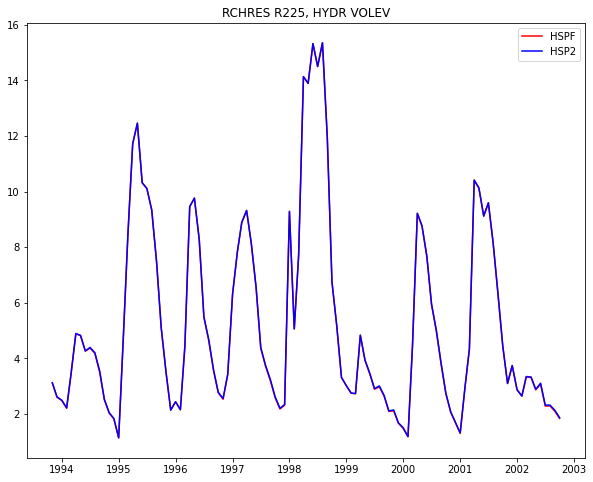

In [83]:
plot('RCHRES', rid, 'HYDR', 'VOLEV', 'sum')

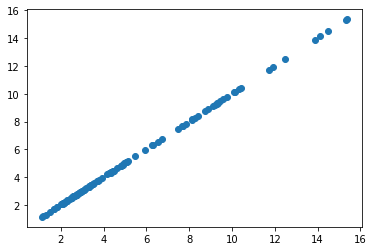

In [84]:
scatter('RCHRES', rid, 'HYDR', 'VOLEV', 'sum')